In [25]:
import sys
sys.path.append('/home/hamid/Desktop/EnsembleTools') # Add the path of the package to the system path for import (SHOULD BE DELETED!)

from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization

ens_codes = [

    Ensemble('PED00174e001', database='ped', chain_id='B'), 
    Ensemble('PED00174e002', database='ped', chain_id='B'), 
    Ensemble('PED00174e003', database='ped', chain_id='B'),
    Ensemble('PED00175e001', database='ped', chain_id='A'), 
    Ensemble('PED00175e002', database='ped', chain_id='A'), 
    Ensemble('PED00175e003', database='ped', chain_id='A'),
    Ensemble('Calvados',data_path='/home/hamid/Downloads/E1A_IDRLab/SIMULATION/traj.dcd',top_path='/home/hamid/Downloads/E1A_IDRLab/SIMULATION/top.pdb'),
    Ensemble('AlphaFold3', data_path= '/home/hamid/Downloads/alphafold3/ensemble.pdb', chain_id='A' )
]
data_dir = '/home/hamid/PED_Data_analysis/nikola' 

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.load_trajectories() 
vis = Visualization(analysis=analysis) 

Ensemble PED00174e001 already downloaded. Skipping.
File PED00174e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00174e001.
Ensemble PED00174e002 already downloaded. Skipping.
File PED00174e002.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00174e002.
Ensemble PED00174e003 already downloaded. Skipping.
File PED00174e003.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00174e003.
Ensemble PED00175e001 already downloaded. Skipping.
File PED00175e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00175e001.
Ensemble PED00175e002 already downloaded. Skipping.
File PED00175e002.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00175e002.
Ensemble PED00175e003 already downloaded. Skipping.
File PED00175e003.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble 

In [26]:
analysis.get_features_summary_dataframe()

,ensemble_code,n_residues,n_conformers,rg_mean,rg_std,asphericity_mean,asphericity_std,prolateness_mean,prolateness_std,sasa_mean,sasa_std,end_to_end_mean,end_to_end_std,flory_exponent,flory_exponent_err
0,PED00174e001,114,20,3.622043,0.225029,0.328339,0.100132,0.305651,0.165384,142.530350,2.517745,6.167331,1.266154,0.250412,0.024821
1,PED00174e002,114,20,3.530795,0.160755,0.320521,0.106644,0.317080,0.175833,141.390793,3.021860,5.867448,1.407777,0.246978,0.025033
2,PED00174e003,114,20,3.511784,0.219271,0.347261,0.111950,0.297827,0.140619,141.702972,4.028578,6.561766,1.211261,0.295674,0.020554
3,PED00175e001,114,20,3.765248,0.747017,0.477127,0.180076,0.170375,0.127487,138.991791,3.927847,9.079308,3.551270,0.592859,0.005008
4,PED00175e002,114,20,3.729986,0.673333,0.488663,0.155943,0.146515,0.091453,138.265564,4.607527,9.039033,3.632971,0.596144,0.003073
5,PED00175e003,114,20,3.801861,0.767728,0.503645,0.186755,0.164997,0.178342,138.483963,3.255097,8.821618,2.264304,0.583607,0.009551
6,Calvados,114,1000,3.428516,0.660971,0.434736,0.186337,0.183055,0.147553,84.963791,0.437067,8.501549,3.026323,0.585980,0.001091
7,AlphaFold3,114,5,4.187521,0.157574,0.247374,0.017703,0.642012,0.078489,147.722260,1.060683,5.386948,1.372966,0.156646,0.036247


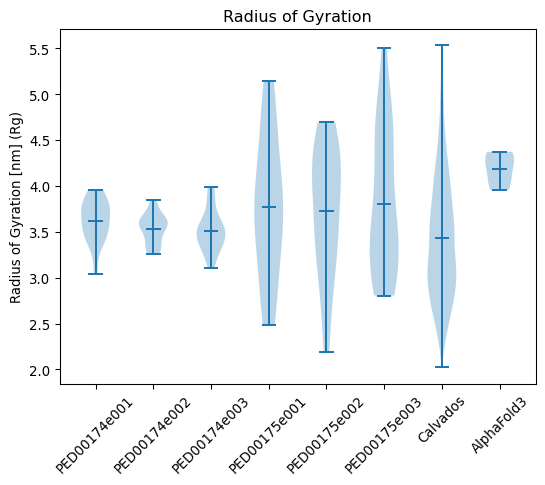

In [27]:
vis.radius_of_gyration(violin_plot=True ,location='mean', bins=40);

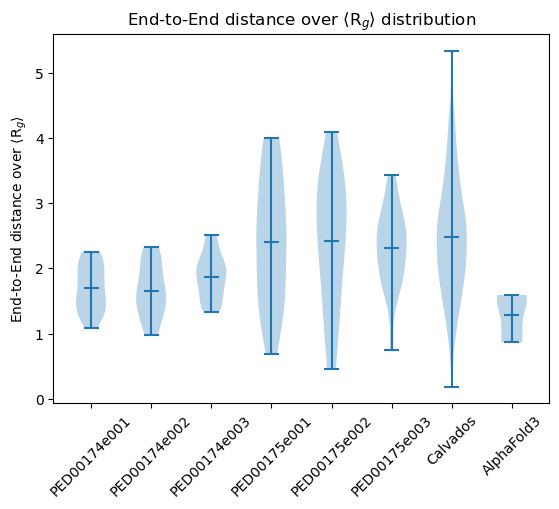

In [28]:
vis.end_to_end_distances(rg_norm=True,location='mean');

<Axes: title={'center': 'Asphericity distribution'}, ylabel='Asphericity'>

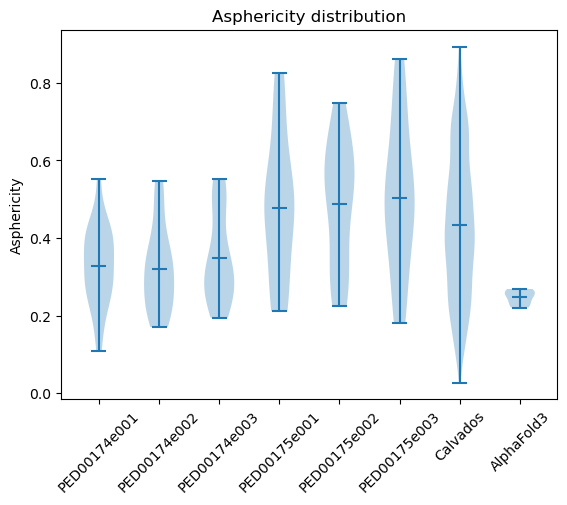

In [29]:
vis.asphericity(location='mean')

In [30]:
v_values = analysis.get_features("flory_exponent")
print(v_values)

{'PED00174e001': 0.2504120174466823, 'PED00174e002': 0.24697789593627695, 'PED00174e003': 0.29567372494558636, 'PED00175e001': 0.5928587387116762, 'PED00175e002': 0.5961435447460068, 'PED00175e003': 0.5836072991082064, 'Calvados': 0.58598020441036, 'AlphaFold3': 0.1566462674779902}


<Axes: xlabel='Residue Index', ylabel='Site-specific order parameter'>

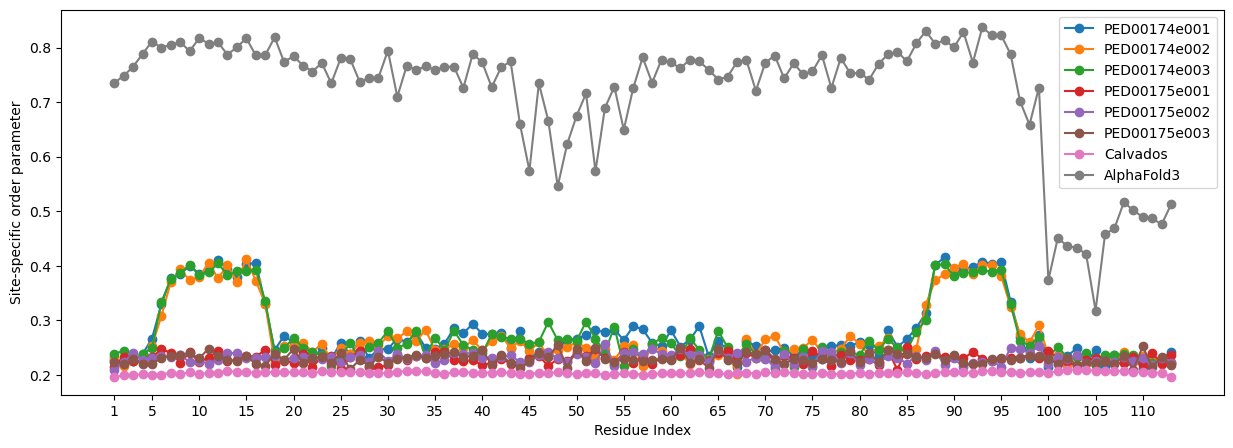

In [31]:
vis.ss_order_parameter()

<Axes: title={'center': 'Distribution of alpha angles'}, xlabel='angle [rad]', ylabel='Density'>

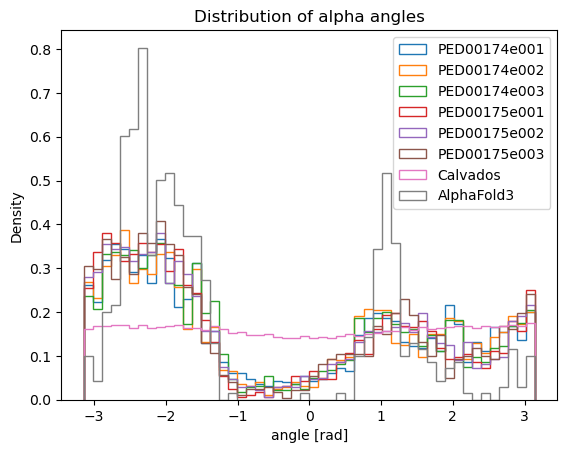

In [34]:
vis.alpha_angles()

# Scoring 'jsd' using features 'ca_dist'
- Number of bins for all comparisons: 3
- Will perform: 28 (pairs of ensembles) x 1 (iterations) = 28 (comparisons)


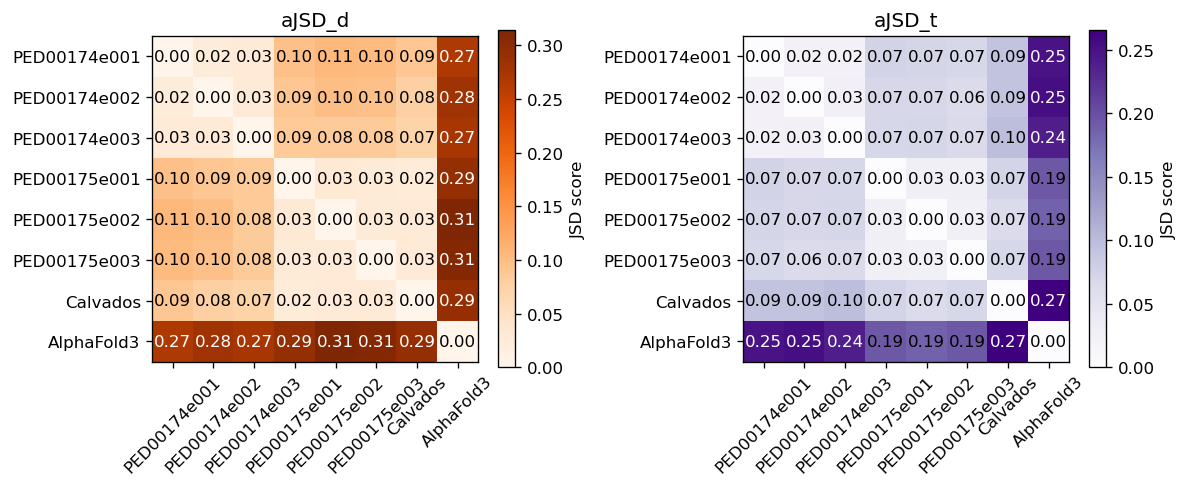

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10.0, 4), dpi=120) # making subplots to generate multiple ax figure

vis.comparison_matrix(
    score="jsd", 
    feature="ca_dist", # Comparing the ensembls using the ditribution of distances between carbon alpha atoms
    bootstrap_iters=0,
    bins="auto",
    ax=ax[0], # using ax parameter you can decide how to put each subplot on the figure
    cmap="Oranges",
    verbose=True
)

vis.comparison_matrix(
    score="jsd",
    feature="alpha_angle", # Comparing the ensembls using distribution of alpha angles
    bootstrap_iters=0,
    bins="auto",
    ax=ax[1],
    cmap="Purples",
    verbose=False
)
analysis.comparison_scores
plt.tight_layout()
plt.show()

In [3]:
analysis.extract_features(featurization='ca_dist');

Performing feature extraction for Ensemble: PED00174e001.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00174e002.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00174e003.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00175e001.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00175e002.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: PED00175e003.
Transformed ensemble shape: (20, 6328)
Performing feature extraction for Ensemble: Calvados.
Transformed ensemble shape: (1000, 6328)
Performing feature extraction for Ensemble: AlphaFold3.
Transformed ensemble shape: (5, 6328)
Feature names: ['GLY1-MET3', 'GLY1-SER4', 'GLY1-HIS5', 'GLY1-PHE6', 'GLY1-GLU7', 'GLY1-PRO8', 'GLY1-PRO9', 'GLY1-THR10', 'GLY1-LEU11', 'GLY1-HIS12', 'GLY1-GLU13', 'GLY1-LEU14', 'GLY1-TYR15', 'GLY1-ASP16', 'GLY1-LEU17', 'GLY1-ASP1

In [5]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 20,  50, 100, 200, 400, 800], circular=False, range_n_clusters=range(2,10,1));

Concatenated featurized ensemble shape: (1125, 6328)
tsne is running...
Best Perplexity: 200
Best Number of Clusters: 2


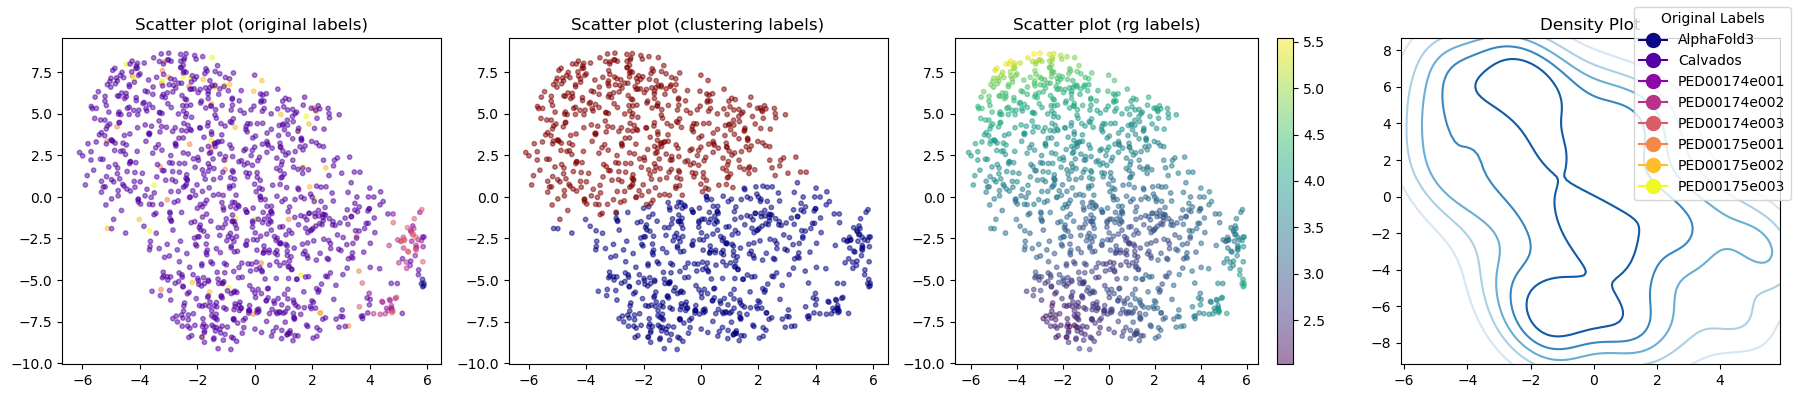

In [7]:
vis.dimensionality_reduction_scatter(color_by='rg', kde_by_ensemble=False)